# ARIMA Model for Predicting Nvidia Stock Price

**Author:** yejin

**References:**
- [Predict Stock Price using ARIMA model (Python)](https://www.youtube.com/watch?v=rsva2qmhGyE)
- [How to Choose the p, d, q Terms to Build ARIMA Model](https://www.youtube.com/watch?v=gqryqIlvEoM)

**Environment:** Python(pyenv 3.11.11)

In [1]:
# Ensure project root is on sys.path for `import models`
import sys, os
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)


In [2]:
# Import everything from models.arima through models package re-exports
from models import *

# Optional: turn off warnings at notebook level
import warnings
warnings.filterwarnings('ignore')


=== ARIMA Model for Nvidia (NVDA) Stock Price Prediction ===

=== ARIMA Model Configuration (NVDA) ===

📅 Available data range: 2022-08-25 to 2025-10-13
📊 Total data points: 786

Configuration:
   Training period: 2025-02-01 to 2025-06-20
   Prediction days: 5
✓ Testing data: 3 samples (for validation)
✓ Training data: 96 samples
✓ Total training samples: 96

Price Statistics:
  Mean: $122.64
  Std: $13.96
  Min: $94.30
  Max: $145.47

Stationarity Test (ADF):
  ADF Statistic: -1.2324
  p-value: 0.6595
  → The time series is NON-STATIONARY (p-value > 0.05)
  → We need to find the order of differencing (d)

🔍 Finding optimal ARIMA parameters...
  ⚠️  pmdarima failed: cannot import name '_lazywhere' from 'scipy._lib._util' (/opt/anaconda3/lib/python3.12/site-packages...
  🔍 Performing manual grid search...
  Searching through parameter combinations...
    New best: ARIMA(0, 0, 0) with AIC: 781.52
    New best: ARIMA(0, 0, 1) with AIC: 697.69
    New best: ARIMA(0, 0, 2) with AIC: 643.51


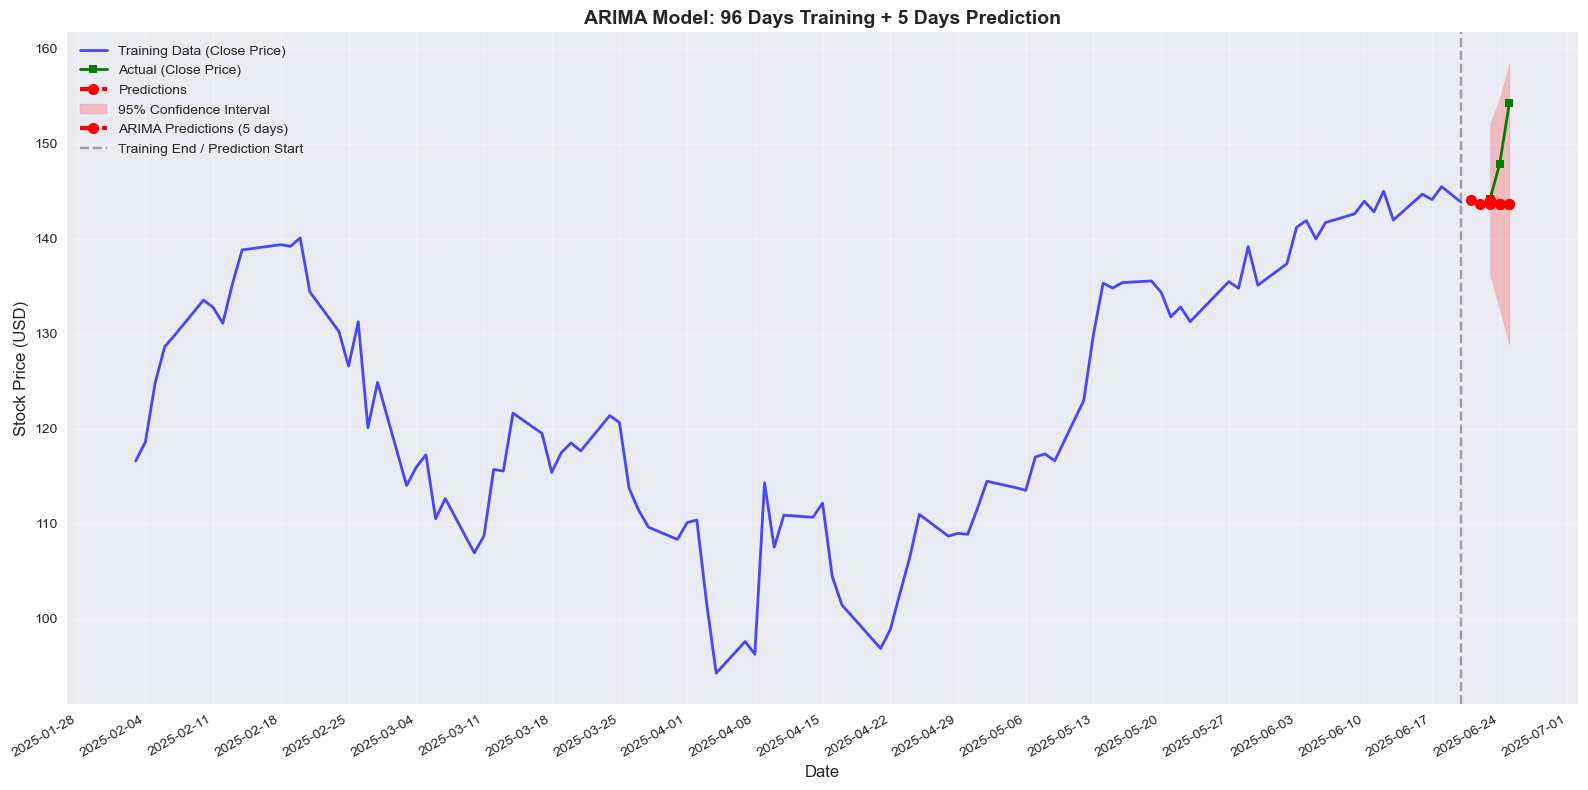


🔍 Model Diagnostics:
  Residuals Statistics:
    Mean: 1.4438
    Std: 12.5566
    Min: -10.2744
    Max: 116.6346
  Ljung-Box test p-value: 1.0000
    → Residuals are not autocorrelated (good!)

🎉 ARIMA analysis completed successfully!
   All major issues have been fixed:
   ✓ Column name consistency ('close' used throughout)
   ✓ Missing forecast_mean variable defined
   ✓ Proper error handling added
   ✓ Visualization code uncommented and fixed
   ✓ Model diagnostics included
Execution time: 14.23 seconds


In [3]:
from models.arima_nvda import main as arima_nvda_main
import time

start_time = time.time()
arima_nvda_main()
end_time = time.time()

execution_time = end_time - start_time
print(f"Execution time: {end_time - start_time:.2f} seconds")


In [4]:
# print NVDA results matrix
import pandas as pd

try:
    results_csv_path = '../results/result_matrix_nvda.csv'
    nvda_matrix = pd.read_csv(results_csv_path, index_col=0)
    print(nvda_matrix)
except Exception as e:
    print('Failed to load NVDA matrix:', e)
    


                   MAE        MSE      RMSE      MAPE
ARIMA         4.970876  43.679190  6.609023  3.261838
TimesFM       3.453388  14.659027  3.828711  1.834447
Chronos       7.419688  75.669775  8.698838  4.792704
TFT_baseline  5.542178  37.413319  6.116643  3.233717
TFT_Reddit    0.443250   0.225302  0.474660  0.260792


In [5]:
# Save/append execution time to a unified matrix under results/
import os, pickle
import pandas as pd

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
results_dir = os.path.join(PROJECT_ROOT, 'results')
os.makedirs(results_dir, exist_ok=True)

ticker = 'NVDA'
model_name = 'ARIMA'
pkl_path = os.path.join(results_dir, f'{ticker}_execution_time.pkl')
csv_path = os.path.join(results_dir, f'{ticker}_execution_time_matrix.csv')

# Ensure execution_time exists
try:
  execution_time
except NameError:
  try:
    execution_time = end_time - start_time
  except NameError:
    execution_time = None

if execution_time is None:
  print('⚠️ execution_time is not defined; skipped saving.')
else:
  # Load existing matrix
  try:
    if os.path.exists(pkl_path):
      with open(pkl_path, 'rb') as f:
        exec_df = pickle.load(f)
    else:
      exec_df = pd.DataFrame(columns=['Execution Time'])
  except Exception:
    exec_df = pd.DataFrame(columns=['Execution Time'])

  # Append/update ARIMA row
  exec_df.loc[model_name] = [execution_time]

  # Save back
  with open(pkl_path, 'wb') as f:
    pickle.dump(exec_df, f)
  exec_df.to_csv(csv_path, index=True)

  print('\nTotal Execution Time Matrix:')
  print(exec_df)


Total Execution Time Matrix:
                           Execution Time
ARIMA                           14.227170
TimesFM                         80.531492
Chronos                          4.120895
TFT_baseline                    44.170151
TFT_with_Reddit_Sentiment      101.990229
